In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
t_u = torch.tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000, 48.400, 60.4000, 68.4000])
t_c = torch.tensor([0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000, 6.0000, 13.0000, 21.0000])

In [5]:
def model(x: torch.Tensor, w: float, b: float):
    return w * x + b

def lossFn(y: torch.Tensor, y_predicted: torch.Tensor) -> torch.Tensor:
    return ((y - y_predicted) ** 2).mean()

In [175]:
w = 1
b = 0

t_p = model(t_u, w, b)
lossFn(t_c, t_p)


tensor(1763.8848)

In [6]:
delta = 0.1
loss_rate_of_change_w = (lossFn(model(t_u, w + delta, b), t_c) - lossFn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
loss_rate_of_change_w

NameError: name 'w' is not defined

In [7]:
# derivatives
def dloss_dypFn(y_predicted, y):
    return 2 * (y_predicted - y) / len(y_predicted)

def dyp_dwFn(x):
    return x

def dyp_dbFn():
    return 1

In [9]:
def gradientFn(y_predicted: torch.Tensor, y: torch.Tensor, x: torch.Tensor):
    dloss_dyp = dloss_dypFn(y_predicted, y)
    dyp_dw = dyp_dwFn(x)
    dyp_db = dyp_dbFn()

    return torch.stack([(dloss_dyp * dyp_dw).sum(), (dloss_dyp * dyp_db).sum()])

In [ ]:
def training_loop(t_c: torch.Tensor, t_u: torch.Tensor, params: torch.Tensor, n_epoch: int, learningRate: float) -> torch.Tensor:
    for i in range(n_epoch):
        w, b = params
        yp = model(t_u, w.item(), b.item())
        loss = lossFn(t_c, yp)
        gradient = gradientFn(yp, t_c, t_u)

        params -= learningRate * gradient
        print(f" Loss: {loss} Params: {params}")
    
    return params


params = torch.tensor([1,0], dtype=torch.float32)

learningRate = 1e-2
t_un = t_u * 0.1

params = training_loop(t_c, t_un, params, 5000, learningRate)

yp = model(t_un, *params)
loss = lossFn(t_c, yp)
loss, params

tensor([ 1.8593, 12.7008, 13.9352, 26.6552, 12.9155,  8.9439,  0.8932, -5.6009,
         8.6755, 15.1160, 19.4097])

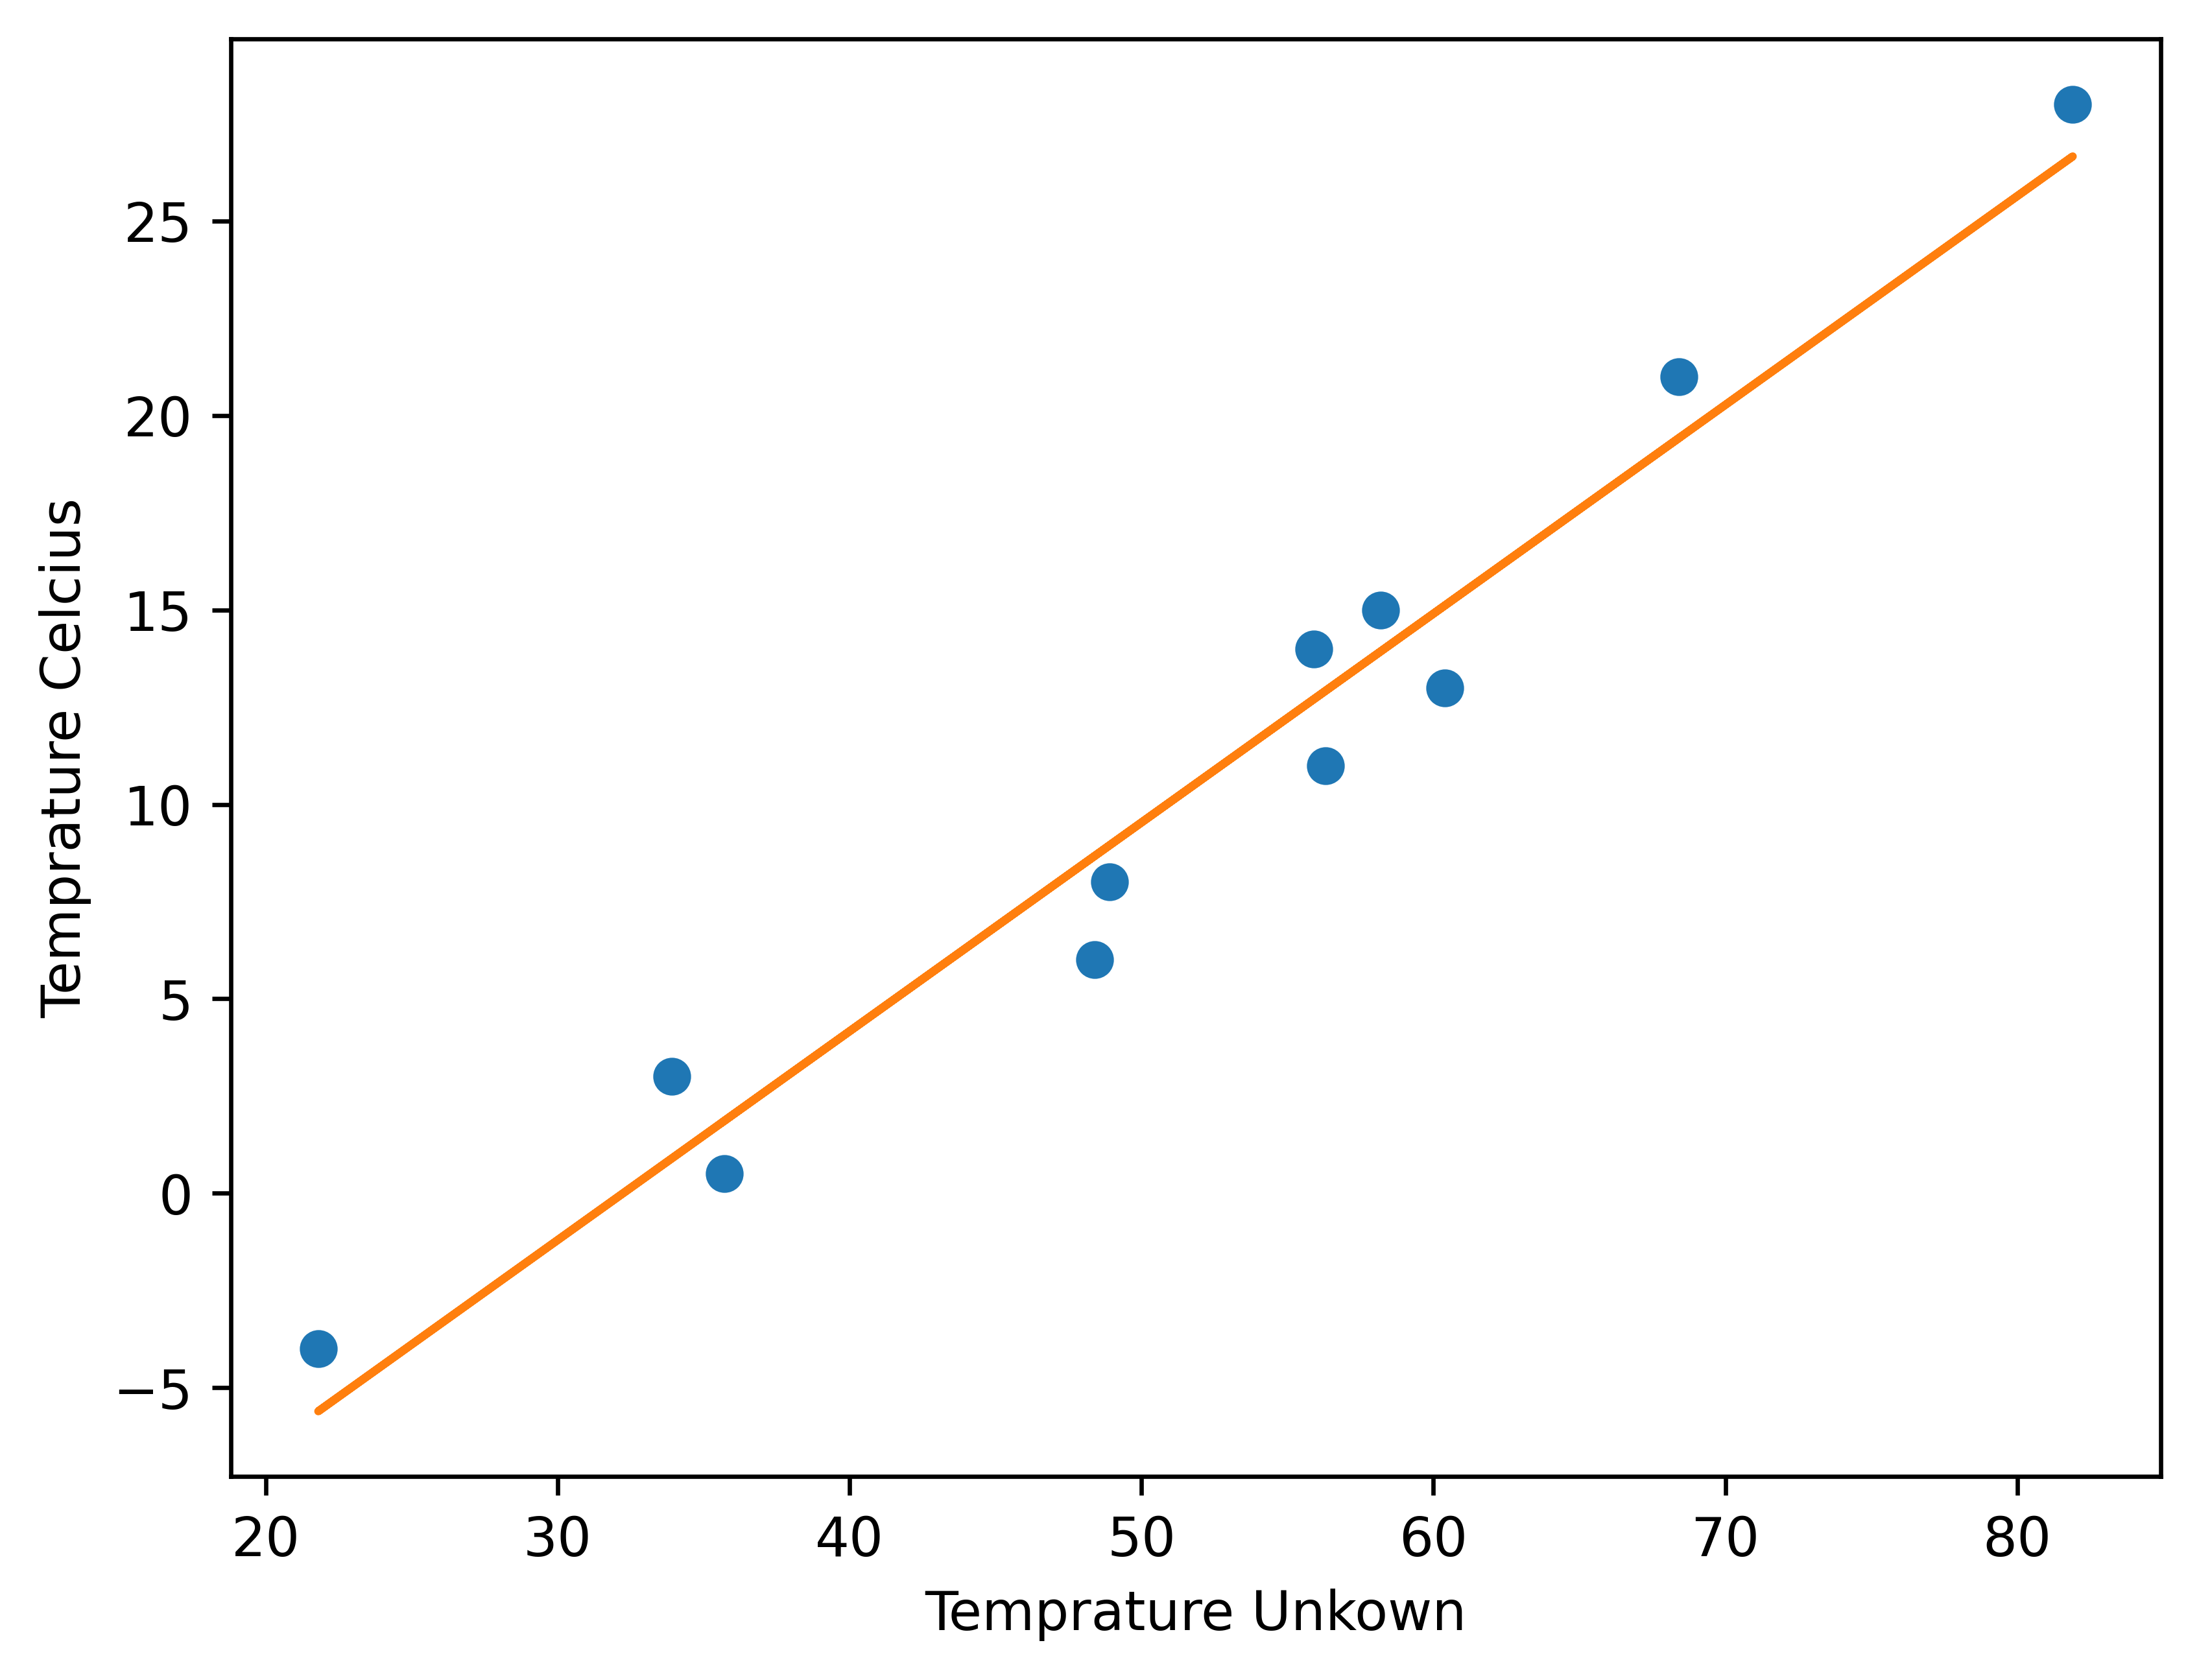

In [13]:
fig = plt.figure(dpi=600)
plt.xlabel("Temprature Unkown")
plt.ylabel("Temprature Celcius")

plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_u.numpy(), yp.detach().numpy(), '-')

yp.detach()